# NAÏVE BAYES ON A REVIEW CLASSIFICATION DATASET

## Task 1: Load & Explore the Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df=pd.read_csv('output.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
#First 10 rows
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
# Number of samples per class 
print(df['Liked'].value_counts())

Liked
1    500
0    500
Name: count, dtype: int64


In [6]:
# Missing values
df.isnull().sum()

 Review    0
Liked      0
dtype: int64

In [8]:
# Clean up column names 
df.columns = df.columns.str.strip()

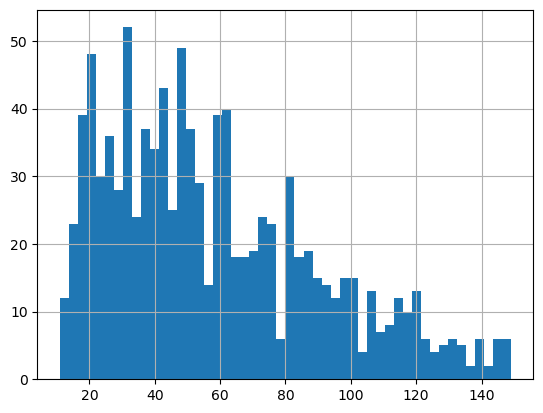

In [11]:
# Review text length distribution 
df['length'] = df['Review'].apply(len) 
df['length'].hist(bins=50) 
plt.show()

## Task 2: Clean & Preprocess the Text

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PALLAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PALLAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation & numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [16]:
df['cleaned'] = df['Review'].apply(clean_text)

## Task 3: Convert Text to Numerical Features

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
# Bag of Words
cv = CountVectorizer()
X_bow = cv.fit_transform(df['cleaned'])

In [19]:
# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned'])

## Task 4: Split the Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y = df['Liked']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42)

## Task 5: Train Naïve Bayes Models

In [24]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


## Task 6: Evaluate Models

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.75
Recall: 0.7788461538461539
F1 Score: 0.7641509433962265


In [27]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[69 27]
 [23 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        96
           1       0.75      0.78      0.76       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



## Task 7: Predict Sentiment of New Reviews

In [28]:
sample_reviews = ["The food was fantastic!", "Worst service ever."]
sample_cleaned = [clean_text(r) for r in sample_reviews]
sample_features = tfidf.transform(sample_cleaned)

predictions = model.predict(sample_features)
for review, pred in zip(sample_reviews, predictions):
    print(f"Review: {review} -> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Review: The food was fantastic! -> Sentiment: Positive
Review: Worst service ever. -> Sentiment: Negative
